In [52]:
import pandas as pd
import numpy as np
from custom_functions import *
from math import pi
from matplotlib import pyplot as plt
import ligo.skymap.plot # Used for geo aitoff projection


#
# Read in files with stripes data
#
fn = 'footprints/DR7/DR7STRIPEDEF.xlsx'
stripes = pd.read_excel(fn)
stripes_ni = pd.read_excel('footprints/DR7/DR7STRIPEDEFNI.xlsx')

#
# Convert to Radians
# 
stripes['etaRad'] = stripes.eta * pi / 180
stripes['lambdaMinRad'] = stripes.lambdaMin * pi / 180
stripes['lambdaMaxRad'] = stripes.lambdaMax * pi / 180

def d2r(ang):
    return ang * pi/180

In [2]:

def sdss_coord_2_cel(l, eta):
    delta = np.arcsin(np.cos(l) * np.sin(eta + d2r(32.5)))
    alpha = np.arccos(-np.sin(l)/np.cos(delta)) + d2r(95)
    return delta, alpha

In [61]:
#
# Creating a new table of eta and lambda pairs, Sampling in between the max 
# and min values and then creating scatter plot
#
n_samples = 20 # Number of samplings between lambdaMax and min
ones = np.ones(n_samples)
master_stripeNums = np.array([])
master_eta = np.array([])
master_lambda = np.array([])
for idx in stripes.index:
    # Each stripe is of constant eta and only has one eta
    stripeNum = stripes.stripeNumber[idx]
    eta = stripes.eta[idx]

    # We sample the lambdas in between
    lambdas = np.linspace(stripes.lambdaMin[idx], stripes.lambdaMax[idx], n_samples)

    # We generate the necessary data to associate the new lambdas to
    stripeNum *= ones
    eta *= ones

    # We concatenate to the master list
    master_stripeNums = np.concatenate((master_stripeNums, stripeNum))
    master_eta = np.concatenate((master_eta, eta))
    master_lambda = np.concatenate((master_lambda, lambdas))


sampled_stripes = {'stripeNum': master_stripeNums, 'etaDeg': master_eta, 'lambdaDeg': master_lambda}

sampled_stripes = pd.DataFrame(sampled_stripes)


In [64]:
lam = d2r(sampled_stripes.lambdaDeg) # Rad
et = d2r(sampled_stripes.etaDeg)
decRad = np.arcsin(np.cos(lam) * np.sin(et + d2r(32.5)))
sampled_stripes['decDeg'] = decRad * 180/pi
sampled_stripes['raDeg'] = np.arccos(-np.sin(lam)/np.cos(decRad)) + d2r(95)

In [65]:
sampled_stripes

,stripeNum,etaDeg,lambdaDeg,decDeg,raDeg
0,1.0,-55.0,-35.500000,-18.152576,2.571387
1,1.0,-55.0,-33.257895,-18.663163,2.611546
2,1.0,-55.0,-31.015789,-19.145572,2.651941
3,1.0,-55.0,-28.773684,-19.598852,2.692565
4,1.0,-55.0,-26.531579,-20.022089,2.733412
...,...,...,...,...,...
955,86.0,-22.5,-72.947368,2.918897,1.951423
956,86.0,-22.5,-86.210526,0.657570,1.723200
957,86.0,-22.5,-99.473684,-1.637825,1.820942
958,86.0,-22.5,-112.736842,-3.848292,2.049468


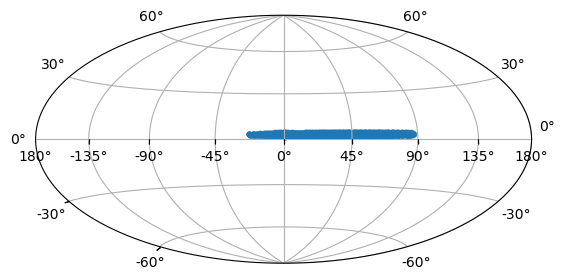

In [67]:
ax = plt.axes(projection="geo aitoff")
ax.grid()

scatter = ax.scatter(sampled_stripes.decDeg, sampled_stripes.raDeg,
                     transform=ax.get_transform('world'),
                     s=10,
                     marker='o',
                     alpha=0.8)